In [12]:
%matplotlib inline
import requests
import json 
import matplotlib.pyplot as plt
import pandas
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster')
import re
import itertools

In [8]:
convention_speeches = glob.glob('../results/receptiviti/convention/*')
inaug_speeches = glob.glob('../results/receptiviti/inaug/*')
sotu_speeches = glob.glob('../results/receptiviti/SOTU/*')

In [15]:
re.findall('(\w+)-.+',  convention_speeches[0])

['clinton']

In [35]:
dataframes = []
 
for president in itertools.izip(convention_speeches, inaug_speeches, sotu_speeches):
    print president
    
    for speech in president:
        j = json.load(open(speech))
        fields = {k:v for k,v in j['liwc_scores'].iteritems() if k != 'categories'}
        fields.update(j['liwc_scores']['categories'])
        df = pandas.DataFrame.transpose(pandas.DataFrame.from_dict(fields, orient='index'))
        df['president'] = re.findall('(\w+)-.+', basename(speech))
        df['type'] = re.findall('.+-(\w+)-.+', basename(speech))
        df['year'] = re.findall('.+-(\d+).+', basename(speech))
        df['speechname'] = basename(speech).replace('.json', '')
        dataframes.append(df)

('../results/receptiviti/convention/clinton-convention-1992.json', '../results/receptiviti/inaug/clinton-inaug-1993.json', '../results/receptiviti/SOTU/clinton-sotu-1993.json')
('../results/receptiviti/convention/gwbush-convention-2000.json', '../results/receptiviti/inaug/gwbush-inaug-2001.json', '../results/receptiviti/SOTU/gwbush-sotu-2001.json')
('../results/receptiviti/convention/hwbush-convention-1998.json', '../results/receptiviti/inaug/hwbush-inaug-1989.json', '../results/receptiviti/SOTU/hwbush-sotu-1989.json')
('../results/receptiviti/convention/obama-convention-2008.json', '../results/receptiviti/inaug/obama-inaug-2009.json', '../results/receptiviti/SOTU/obama-sotu-2009.json')
('../results/receptiviti/convention/reagan-convention-1980.json', '../results/receptiviti/inaug/reagan-inaug-1981.json', '../results/receptiviti/SOTU/reagan-sotu-1981.json')


In [36]:
trumps = (convention_speeches[-1], inaug_speeches[-1])
for speech in trumps:
        j = json.load(open(speech))
        fields = {k:v for k,v in j['liwc_scores'].iteritems() if k != 'categories'}
        fields.update(j['liwc_scores']['categories'])
        df = pandas.DataFrame.transpose(pandas.DataFrame.from_dict(fields, orient='index'))
        df['president'] = re.findall('(\w+)-.+', basename(speech))
        df['type'] = re.findall('.+-(\w+)-.+', basename(speech))
        df['year'] = re.findall('.+-(\d+).+', basename(speech))
        df['speechname'] = basename(speech).replace('.json', '')
        dataframes.append(df)

In [37]:
df = pandas.concat(dataframes)
df = df.set_index('speechname',drop=True)
df.to_csv('../results/receptiviti/master/all-president-trajectories.csv')

In [38]:
df.type

speechname
clinton-convention-1992    convention
clinton-inaug-1993              inaug
clinton-sotu-1993                sotu
gwbush-convention-2000     convention
gwbush-inaug-2001               inaug
gwbush-sotu-2001                 sotu
hwbush-convention-1998     convention
hwbush-inaug-1989               inaug
hwbush-sotu-1989                 sotu
obama-convention-2008      convention
obama-inaug-2009                inaug
obama-sotu-2009                  sotu
reagan-convention-1980     convention
reagan-inaug-1981               inaug
reagan-sotu-1981                 sotu
trump-convention-2016      convention
trump-inaug-2017                inaug
Name: type, dtype: object

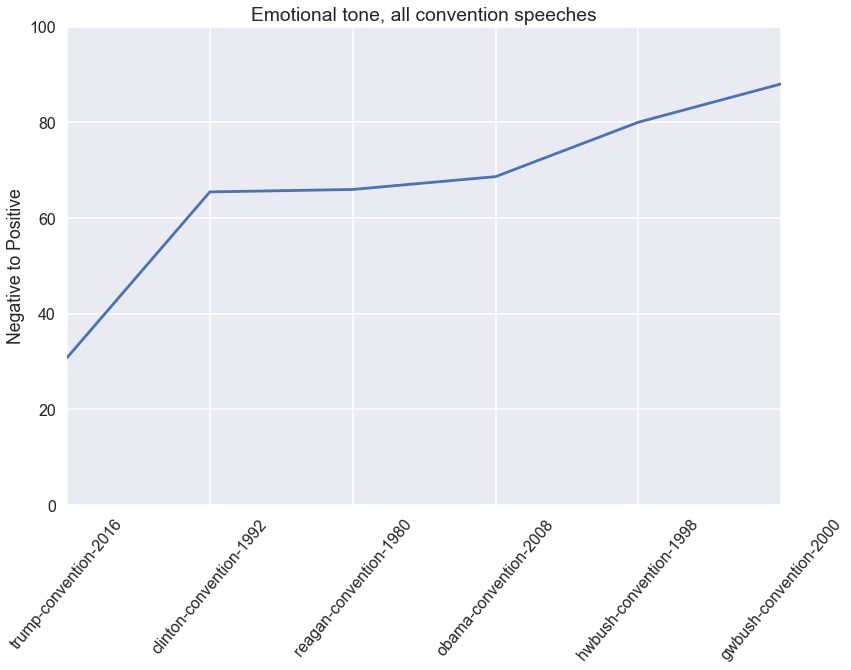

In [45]:
df[df.type=='convention'].sort_values('tone').tone.plot()
plt.xticks(rotation=50)
plt.ylabel('Negative to Positive')
plt.ylim([0,100])
plt.xlabel('')
plt.title("Emotional tone, all convention speeches")
plt.savefig('../figs/trajectories/all-conventions-tone-ranked.png')

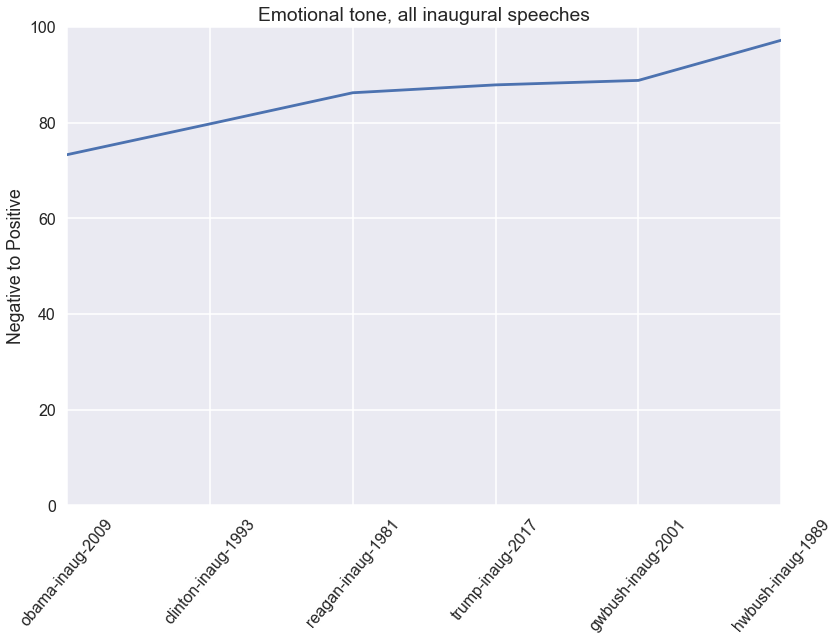

In [46]:
df[df.type=='inaug'].sort_values('tone').tone.plot()
plt.xticks(rotation=50)
plt.ylabel('Negative to Positive')
plt.ylim([0,100])
plt.xlabel('')
plt.title("Emotional tone, all inaugural speeches")
plt.savefig('../figs/trajectories/all-inaug-tone-ranked.png')

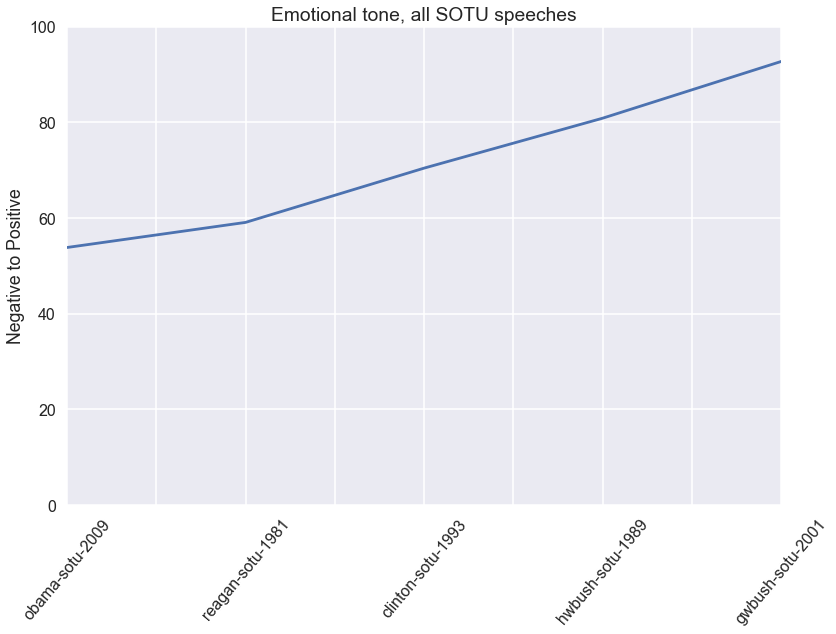

In [47]:
 df[df.type=='sotu'].sort_values('tone').tone.plot()
plt.xticks(rotation=50)
plt.ylabel('Negative to Positive')
plt.ylim([0,100])
plt.xlabel('')
plt.title("Emotional tone, all SOTU speeches")
plt.savefig('../figs/trajectories/all-sotu-tone-ranked.png')

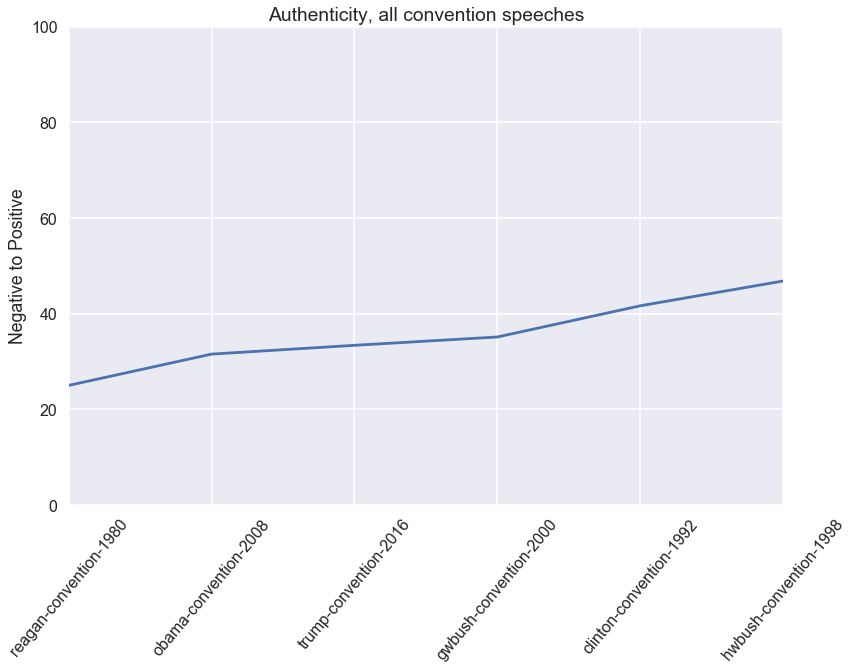

In [50]:
df[df.type=='convention'].sort_values('authentic').authentic.plot()
plt.xticks(rotation=50)
plt.ylabel('Negative to Positive')
plt.ylim([0,100])
plt.xlabel('')
plt.title("Authenticity, all convention speeches")
plt.savefig('../figs/trajectories/all-sotu-auth-ranked.png')

In [ ]:
df[df.type=='ianug'].sort_values('authentic').authentic.plot()
plt.xticks(rotation=50)
plt.ylabel('Negative to Positive')
plt.ylim([0,100])
plt.xlabel('')
plt.title("Authenticity, all inaugural speeches")
plt.savefig('../figs/trajectories/all-sotu-auth-ranked.png')